In [1]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
#loading the tips dataset
tips_df = sns.load_dataset('tips')

In [4]:
#viewing the first five rows of the tips_df
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#checking for missing values in the tips_df
print(tips_df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


#### There are no missing values in any of the columns of the tips_df as shown above

In [10]:
#checking for duplicates
print(tips_df.duplicated().sum())

1


#### There is one duplicate in the tips_df and should be removed

In [12]:
#removing duplicates
tips_df = tips_df.drop_duplicates()

In [13]:
#checking again for duplicates
print(tips_df.duplicated().sum())

0


In [14]:
#getting the descriptive summary of the tips_df
tips_df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [15]:
#checking basic information about the tips_df
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [19]:
#selecting only numeric columns for statistical calculations
numeric_cols = tips_df.select_dtypes(include = ['int64', 'float64'])

In [31]:
#calculating the mean, median and standard deviation of the numeric columns
print('mean:\n',numeric_cols.mean())
print('median:\n',numeric_cols.median())
print('standard deviation:\n',numeric_cols.std())

mean:
 total_bill    19.813868
tip            3.002387
size           2.572016
dtype: float64
median:
 total_bill    17.81
tip            2.92
size           2.00
dtype: float64
standard deviation:
 total_bill    8.910071
tip           1.385002
size          0.952356
dtype: float64


In [32]:
#checking the mode of all colums in the tips_df
print(tips_df.mode())

   total_bill  tip   sex smoker  day    time  size
0       13.42  2.0  Male     No  Sat  Dinner     2


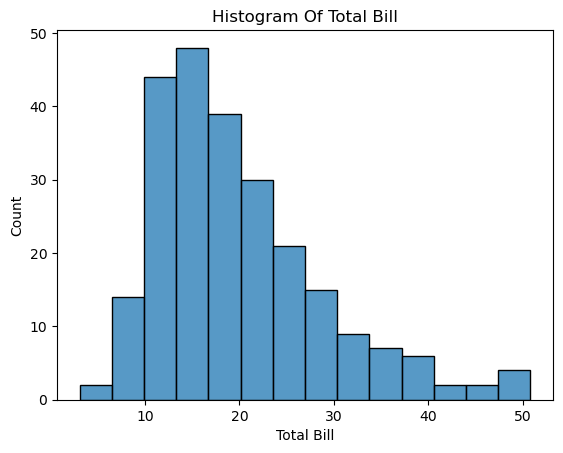

In [35]:
#plotting a histogram of total_bill column in the tips_df
sns.histplot(tips_df['total_bill'])
plt.title('Histogram Of Total Bill')
plt.xlabel('Total Bill')
plt.show()

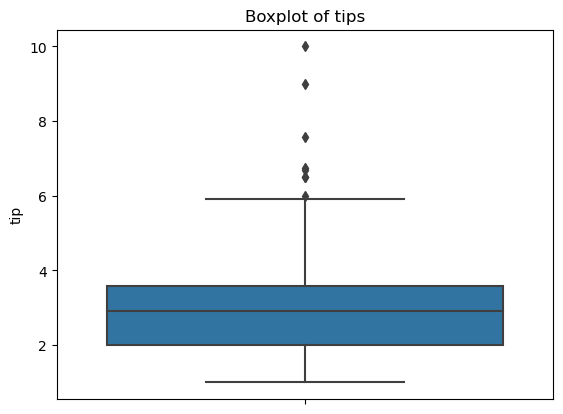

In [36]:
#checking for outliers in tip column of the tips_df
sns.boxplot(y = tips_df['tip'])
plt.title('Boxplot of tips')
plt.show()

#### Wecan further break this down by showing the outliers by day

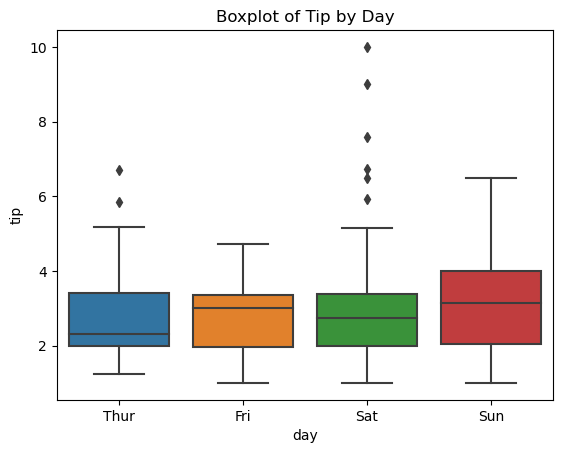

In [37]:
#boxplot of tips by day
sns.boxplot(x = 'day',y = 'tip', data = tips_df)
plt.title('Boxplot of Tip by Day')
plt.show()

### Drawing inferences:
### Hypothesis testing
#### Testing if there is a significant difference in tip amount among smokers and non smokers using a t test
#### Defining null and alternate hypothesis
#### Null hypothesis: There is no relationship between smokers and non smokers with regards to tip amount.
#### Alternate hypothesis: There is a relationship between smokers and non smokers with regards to tip amount
#### Threshold: If p_value is less than 0.5, reject the null hypothesis. Else, do not reject the null hypothesis


In [39]:
#grouping smokers and non smokers in variables
smokers = tips_df[tips_df['smoker'] == 'Yes']['tip']
non_smokers = tips_df[tips_df['smoker'] == 'No']['tip']

In [40]:
#performing a t_test on the two groups
t_stat, p_value = stats.ttest_ind(smokers, non_smokers)

In [41]:
#displaying the t_stat and p_value values
print('t_statistics: ', t_stat)
print('p_value: ', p_value)

t_statistics:  0.15156585951381893
p_value:  0.8796561596489987


In [42]:
#deciding on the hypothesis to work with
if p_value < 0.5:
    print('Reject the null hypothesis')
else:
    print('Do not reject the null hypothesis')


Do not reject the hypothesis


#### Therefore, the inference drawn here is that, there is no relationship between smokers and non smokers with regards to tip amount